In [ ]:
import pandas as pd
import sqlite3 as sql

In [ ]:
engine = sql.connect('temp1000.db')
cursor= engine.cursor()

In [ ]:
url = "https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv"
tips = pd.read_csv(url)

In [ ]:
tips.to_sql('tipsDB', con=engine)

In [ ]:
cursor.execute('select * from tipsDB LIMIT 5').fetchall()

In [ ]:
tips.head()

In [ ]:
tips.columns

In [ ]:
cursor.execute('PRAGMA table_info(tipsDB)').fetchall()

In [ ]:
tips.info()

In [ ]:
tips.smoker.map(type)

In [ ]:
sql_select = 'SELECT total_bill, tip, smoker, time\
              FROM tipsDB\
              LIMIT 5'
cursor.execute(sql_select).fetchall()

In [ ]:
tips[['total_bill','tip','smoker','time']].head()

In [ ]:
sql_select = 'SELECT *, tip/total_bill as tip_rate\
                FROM tipsDB\
                LIMIT 5'
cursor.execute(sql_select)
cl_names = []
for x in cursor.description: 
    cl_names.append(x[0])


print(cl_names)
for row in cursor.fetchall():
    print(row)


In [ ]:
tips.assign(tip_rate=tips["tip"] / tips["total_bill"]).head(5)

In [ ]:
### WHERE ####3
sql_filter = 'SELECT * FROM tipsDB WHERE time = "Dinner" LIMIT 5'
cursor.execute(sql_filter).fetchall()

In [ ]:
tips[tips['time']=='Dinner'].head()

In [ ]:
sql_select_3 = 'SELECT * FROM tipsDB WHERE time = "Dinner" AND tip > 5.00'
cursor.execute(sql_select_3).fetchall()

In [ ]:
tips[(tips['time'] == 'Dinner') & (tips['tip'] > 5.00)].head()

In [ ]:
sql_update = 'update tipsDB set tip=NULL where tip=7.58'
cursor.execute(sql_update)
engine.commit()

In [ ]:
cursor.execute('select * from tipsDB where total_bill=39.42').fetchall()

In [ ]:
sql_isnull = 'SELECT * FROM tipsDB WHERE tip IS NULL'
cursor.execute(sql_isnull).fetchall()

In [ ]:
#import numpy as np
tips[tips['tip'].isna()]

tips.loc[tips['tip']<3.0,'tip']=None


In [ ]:
tips[tips['tip'].isna()]

In [ ]:
sql_isnotnull = 'SELECT * FROM tipsDB WHERE total_bill IS NOT NULL'
cursor.execute(sql_isnotnull).fetchall()

In [ ]:
tips[tips["total_bill"].notna()]

In [ ]:
### GROUP BY ###
sql_groupby = 'SELECT sex, count(*) FROM tipsDB GROUP BY sex'
cursor.execute(sql_groupby).fetchall()


In [ ]:
tips.groupby('sex').size()

In [ ]:
sql = 'SELECT smoker, day, COUNT(*), AVG(tip) FROM tipsDB GROUP BY smoker, day'
cursor.execute(sql).fetchall()

In [ ]:
tips.groupby(["smoker", "day"]).agg({"tip": ['count', 'mean']})

In [ ]:
db_Airbnb = pd.read_csv('listings-2.csv')

df1 = db_Airbnb[['bedrooms','accommodates','price']]


df2 = df1.assign(price=df1['price'].str.replace('$', ''))
df3 = df2.assign(price=df2['price'].str.replace(',', '').astype(float))

df3.groupby(["bedrooms"]).mean()
df3.groupby(["bedrooms"]).agg({"price":['mean']})

#db_filtered.groupby(["bedrooms"]).agg({"price":['mean']})

In [ ]:
df1["accommodates"].isnull().sum()


In [ ]:
df3[["price","accommodates"]].corr()

In [ ]:
import numpy as np
values = np.random.randn(4)
values = np.append(values,np.nan)

df1 = pd.DataFrame({"key": ["A", "B", "C", "D","E"], "value": values})
df2 = pd.DataFrame({"key": ["B", "D", "D", "E"], "value": np.random.randn(4)})


df1.to_sql('df1DB', con=engine)
df2.to_sql('df2DB', con=engine)

In [ ]:
sql_join = 'SELECT * FROM df1DB INNER JOIN df2DB ON df1DB.key = df2DB.key'
cursor.execute(sql_join).fetchall()

In [ ]:
pd.merge(df1, df2, on="key")

In [ ]:
sql_leftjoin = 'SELECT * FROM df1DB LEFT OUTER JOIN df2DB ON df1DB.key = df2DB.key'
cursor.execute(sql_leftjoin).fetchall()

In [ ]:
pd.merge(df1, df2, on="key", how="left")

In [ ]:
df3 = pd.DataFrame( 
        {"city": ["Chicago", "San Francisco", "New York City"], "rank": range(1, 4)}
        )

df4 = pd.DataFrame(
        {"city": ["Chicago", "Boston", "Los Angeles"], "rank": [1, 4, 5]})


In [ ]:
df3.to_sql('df3DB', con=engine)
df4.to_sql('df4DB', con=engine)

In [ ]:
sql_union = 'SELECT *\
                FROM df3DB\
                UNION ALL\
             SELECT *\
                FROM df4DB'
cursor.execute(sql_union).fetchall()

In [ ]:
header_list = ["personid", "firstname", "middleinitial","lastname","dateofbirth"]
path_file = "/Users/charles/Documents/Infnet/Semana4/Sample/SamplePersonData"
df_Person = pd.read_csv(path_file, names=header_list)
df_Person

In [ ]:
header_list = ["studentid", "personid", "email"]
path_file = "/Users/charles/Documents/Infnet/Semana4/Sample/SampleStudentData"
df_Student = pd.read_csv(path_file, names=header_list)
df_Student                         

In [ ]:
header_list = ["courseid", "name", "teacher"]
path_file = "/Users/charles/Documents/Infnet/Semana4/Sample/SampleCourseData"
df_Course = pd.read_csv(path_file, names=header_list)
df_Course

In [ ]:
header_list = ["studentid", "courseid", "grade","attempt"]
path_file = "/Users/charles/Documents/Infnet/Semana4/Sample/SampleCreditData"
df_Credit = pd.read_csv(path_file, names=header_list)
df_Credit

In [ ]:
df_Credit.groupby(df_Credit.grade > 83.5).size()

In [ ]:
df_Course.name.sort_values(ascending=True)

In [ ]:
df_Person[df_Person.lastname.str.contains("ez")]

In [ ]:
df_n = df_Credit[['studentid','grade']]

In [ ]:
df_n.assign(status= lambda x: np.where(x["grade"] > 70.0, "Aprovado", "Reprovado"))

#lambda x: np.where(x["grade"] > 70.0, "Apr", "Repr")

In [ ]:
conditions = "courseid"
df_m = pd.merge(df_Credit,df_Course,on=conditions)

In [ ]:
#df_nameCourse = df_m[df_m.grade.mean() > 70.0]
df_m.grade.mean()

In [ ]:
## Realizar uma consulta que retorne os email dos alunos que cursaram 3 vezes um mesmo curso  

df_res = pd.merge(df_Student,df_Credit,on="studentid")

In [ ]:
df_res1 = df_res[df_res["attempt"] == 3]

In [ ]:
df_res1.email

In [ ]:
## DESAFIO) Realizar uma consulta que retorne os nomes dos professores mais carrascos - isto é - aqueles cujo o número de alunos reprovados (média menor que 70.0) foi maior do que de
## alunos aprovados.

df_ = pd.merge(df_Course, df_Credit,on="courseid")

In [ ]:
df_

In [ ]:
df__ = df_.assign(status= lambda x: np.where(x["grade"] > 70.0, "Aprovado", "Reprovado"))
df__

In [ ]:
df_f = df__.groupby(["teacher","status"]).size()

In [ ]:
df_f.head()

In [ ]:
df_4 = df_f.reset_index(name = "Total")
df_4.groupby(['teacher']).agg({'Total': ['max']})

In [ ]:

lst_index  = (df_4.loc[range(0,len(df_4),2),'Total']) 
lst_index2  = (df_4.loc[range(1,len(df_4),2),'Total']) 

idx=[]

for i in range(len(lst_index)):
        if lst_index.values[i] < lst_index2.values[i]: 
            idx.append(lst_index2.index[i])
        else: 
            idx.append(lst_index.index[i])
        
df_4.values[idx]

In [ ]:
df_4.groupby(['teacher']).max()

In [ ]:
####  Achar os estudantes do prof. Harley Albert que obtiveram média > 70.0 
### A consulta deverá retornar os seguintes atributos: FirstName, LastName, Course(Name), Média (Grade)  
df_merge_Course_Credit = pd.merge(df_Course,df_Credit,on='courseid')


In [ ]:
df_Course_Credit_prof_H = df_merge_prof.loc[df_merge_Course_Credit.courseid==30]

In [ ]:
df_Course_Credit_Stud_profH = pd.merge(df_Course_Credit_prof_H,df_Student,on='studentid')

In [ ]:
df_Student_Course_Credit_Stud_profH = pd.merge(df_Person,df_Course_Credit_Stud_profH,on='personid')

In [ ]:
df_studentnames_of_result = df_Student_Course_Credit_Stud_profH.loc[(df_Student_Course_Credit_Stud_profH.grade > 70.0)]


In [ ]:
df_studentnames_of_result_ =df_studentnames_of_result[['firstname','lastname','name','grade']]

In [ ]:
df_studentnames_of_result_

In [ ]:
import pandas as pd
#dfClean = pd.read_csv('dirtydata_Semana5.csv')
dfClean = pd.read_csv('data.csv')
dfClean

In [ ]:
#dfClean['Date'].str.match("'[0-9]{4}/[0-9]{2}/[0-9]{2}'")

In [ ]:
#### Verifica se tem duplicatas no Dataframe ###3
dfClean[dfClean.duplicated()]

In [ ]:
### Remove as duplicatas ####
dfClean.drop_duplicates(inplace=True)

In [ ]:
### Reset_index #### 
dfClean.reset_index(drop=True)

In [ ]:
### Verifica se tem valores nulos na tabela ###
dfClean.isnull().sum()

In [ ]:
dfClean.info()


In [ ]:
### Tipos de uma coluna #### 
dfClean.Calories.map(type)

In [ ]:
### Visualiza a coluna Calories #####
dfClean[dfClean.Calories.isna()]

In [ ]:
#### Substituir pela média ##### 
avg_45 = dfClean[dfClean.Duration==45].Calories.mean()
avg_45

In [ ]:
avg_60 = dfClean[dfClean.Duration==60].Calories.mean()
avg_60

In [ ]:
dfClean.loc[(dfClean.Calories.isna()) & (dfClean.Duration==60),'Calories'] = avg_60

In [ ]:
dfClean.loc[(dfClean.Calories.isna()) & (dfClean.Duration==45),'Calories'] = avg_45

In [ ]:
dfClean[dfClean.Calories.isnull()]

In [ ]:
## Visualização do DataFrame ###### 


### Regressão Linear #####

#### Coeficiente de Determinação (R-squared) : 

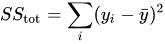
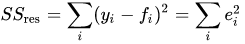
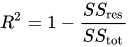

#### Mean squared error :

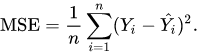

 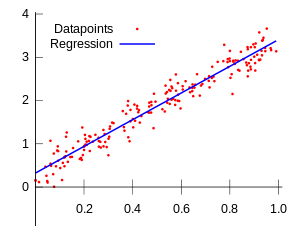

In [ ]:
dfClean.describe()

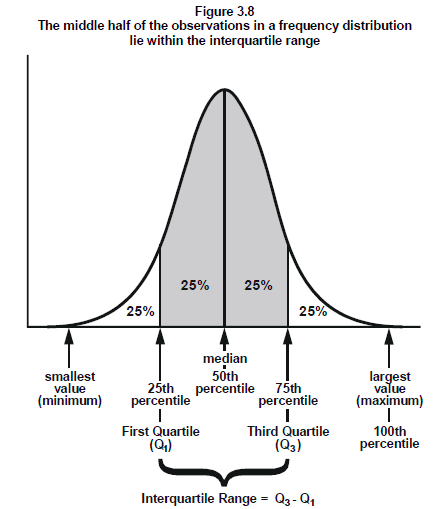

In [ ]:
dfClean.corr()

In [ ]:
### P-Values
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dfClean['Duration'], dfClean['Calories'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

In [ ]:
#### Visualizar Duration x Calories 


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
### Definir as Variáveis X e Y 
X = 
Y = 

In [ ]:
### Acha a reta que melhor descreve a distribuição dos dados 


In [ ]:
### Usa o modelo para predição #### 
  

In [ ]:
### R-squared #####
#print('The R-square is: ', lr.score(X, Y))

In [ ]:
#### MSE - Mean Squared Error #### 
from sklearn.metrics import mean_squared_error

#print('The mean square error of Calories and predicted value is: ', mse)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
#width = 12
#height = 10
#plt.figure(figsize=(width, height))
#sns.regplot(x="Duration", y="Calories", data=dfClean)


In [ ]:
#width = 12
#height = 10
#plt.figure(figsize=(width, height))
#x =dfClean['Duration']
#y = dfClean['Calories']
#sns.residplot(x,y)
#plt.show()